In this Lab today, we will run the kNN model to determine the best ‘k’ value in order to determine whether a wine is of high quality. 

We will use the following features: ‘density’, ‘sulphates’, residual sugar’.

Please check 'k' values from 1 to 50 in order to determine the best 'k' value.

Below is start code which obtains demo data from Amazon Web Services website:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]

features = ['density', 'sulphates', 'residual_sugar']

In [2]:
print train.head(2)
print test.head(2)

    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
11            7.5              0.50         0.36             6.1      0.071   
13            7.8              0.61         0.29             1.6      0.114   

    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
11                 17.0                 102.0   0.9978  3.35       0.80   
13                  9.0                  29.0   0.9974  3.26       1.56   

    alcohol  quality color  is_red  high_quality  
11     10.5        5   red     1.0           0.0  
13      9.1        5   red     1.0           0.0  
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   


In [3]:
results = []
i = 1

while i <= 50:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train[features], train['high_quality'])
    prediction = model.predict(test[features])
    accuracy = np.where(prediction==test['high_quality'], 1, 0).sum() / float(len(test))
    print "Neighbors: %d, Accuracy: %3f" % (i, accuracy)
    i += 1
    results.append([i, accuracy])

Neighbors: 1, Accuracy: 0.754750
Neighbors: 2, Accuracy: 0.796244
Neighbors: 3, Accuracy: 0.762830
Neighbors: 4, Accuracy: 0.787727
Neighbors: 5, Accuracy: 0.776807
Neighbors: 6, Accuracy: 0.793405
Neighbors: 7, Accuracy: 0.786416
Neighbors: 8, Accuracy: 0.797554
Neighbors: 9, Accuracy: 0.791002
Neighbors: 10, Accuracy: 0.799301
Neighbors: 11, Accuracy: 0.795152
Neighbors: 12, Accuracy: 0.797772
Neighbors: 13, Accuracy: 0.798209
Neighbors: 14, Accuracy: 0.801922
Neighbors: 15, Accuracy: 0.799738
Neighbors: 16, Accuracy: 0.800611
Neighbors: 17, Accuracy: 0.799520
Neighbors: 18, Accuracy: 0.800830
Neighbors: 19, Accuracy: 0.799956
Neighbors: 20, Accuracy: 0.802140
Neighbors: 21, Accuracy: 0.800611
Neighbors: 22, Accuracy: 0.802795
Neighbors: 23, Accuracy: 0.801267
Neighbors: 24, Accuracy: 0.802140
Neighbors: 25, Accuracy: 0.802359
Neighbors: 26, Accuracy: 0.802577
Neighbors: 27, Accuracy: 0.802577
Neighbors: 28, Accuracy: 0.802577
Neighbors: 29, Accuracy: 0.801703
Neighbors: 30, Accuracy

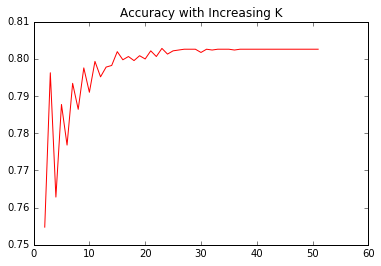

In [4]:
#optimal K is 26
results = pd.DataFrame(results, columns=["i", "accuracy"])

plt.plot(results.i, results.accuracy, color='r')
plt.title("Accuracy with Increasing K")
plt.show()

In [5]:
df['high_quality'].unique()

array([ 0.,  1.])

In [9]:
print df.head(2)
print df.shape

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality color  is_red  high_quality  
0      9.4        5   red     1.0           0.0  
1      9.8        5   red     1.0           0.0  
(6497, 15)


In [8]:
y = df['high_quality']
y.head(3)

0    0.0
1    0.0
2    0.0
Name: high_quality, dtype: float64

In [20]:
X = df.ix[:, 0:12]
X.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [26]:
X.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
intercept               float64
dtype: object

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
print logreg.coef_
print logreg.intercept_

[[ -8.92959812e-01  -1.27318957e-01  -1.15324386e-01  -1.25374857e-01
   -8.41487994e-01  -3.74579358e-03  -1.71422947e-02  -5.73834050e+00
   -8.45330756e+00   1.29220424e-01  -6.90010998e-01   9.34018597e+00
   -5.80407677e+00]]
[-5.80407677]


In [35]:
X_new = np.random.randn(100, 13)

In [40]:
# predict class:
y_pred = logreg.predict(X_new)
y_pred

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.])

In [39]:
# predicted probability:
y_pp = logreg.predict_proba(X_new)
y_pp

array([[  9.99997706e-01,   2.29433217e-06],
       [  9.99911954e-01,   8.80464440e-05],
       [  9.98871013e-01,   1.12898678e-03],
       [  1.00000000e+00,   1.82586768e-12],
       [  1.00000000e+00,   4.11610522e-10],
       [  7.54951657e-14,   1.00000000e+00],
       [  9.99932216e-01,   6.77837331e-05],
       [  2.40699563e-01,   7.59300437e-01],
       [  9.99755014e-01,   2.44985550e-04],
       [  6.87809621e-01,   3.12190379e-01],
       [  3.50130766e-01,   6.49869234e-01],
       [  9.99999956e-01,   4.37339687e-08],
       [  1.57800723e-06,   9.99998422e-01],
       [  9.99561626e-01,   4.38373775e-04],
       [  9.99996212e-01,   3.78801386e-06],
       [  6.63683405e-01,   3.36316595e-01],
       [  1.00000000e+00,   4.11929208e-12],
       [  9.98363980e-01,   1.63601976e-03],
       [  4.11335240e-01,   5.88664760e-01],
       [  9.93608724e-04,   9.99006391e-01],
       [  9.99997297e-01,   2.70329753e-06],
       [  8.23242942e-01,   1.76757058e-01],
       [  